## A view into the energy consumption of Slovenia by type of energy source and usage yearly
Data mining, project, `12.4.2022`  
**`Marta Rašeta`, `Tilen Berlak`, `Aladin Ćemalović`**

In [214]:
#Preparing the data


#Replace the unknown/null values with -1 to be able to put them into a numpy matrix
with open("usage_data.csv") as f_input:
    text = [l.replace("-", "-1") for l in f_input]
import numpy as np
usage_data= np.loadtxt(text, delimiter=",", dtype="float")


column_names = []
row_names = []
#Get the column and row names 
f = open("usage_headers.csv", "r")
column_names=f.readline().strip().split(",")

for x in f:
    row_names.append(x.strip())
row_names=np.array(row_names)    

In [215]:
import matplotlib.pyplot as plt

w=int(len(column_names)/10)
h=len(row_names)-1

matrix = [[0 for x in range(h)] for y in range(w)] 


for year in range(w):
    count=0
    for x in usage_data[1:,year*10]:

        matrix[year][count]=x
        count+=1
  
npmat =np.array(matrix)


#Delete unnecessary metrics
names=np.delete(row_names,[0,5],0)

npmat=np.delete(npmat,4,axis=1)

npmat[npmat==-1]=np.nan




#### What is the average consumption of all energy consumers?
For this question we will calculate the average energy consumption for every usage and represent the data on a barplot. 

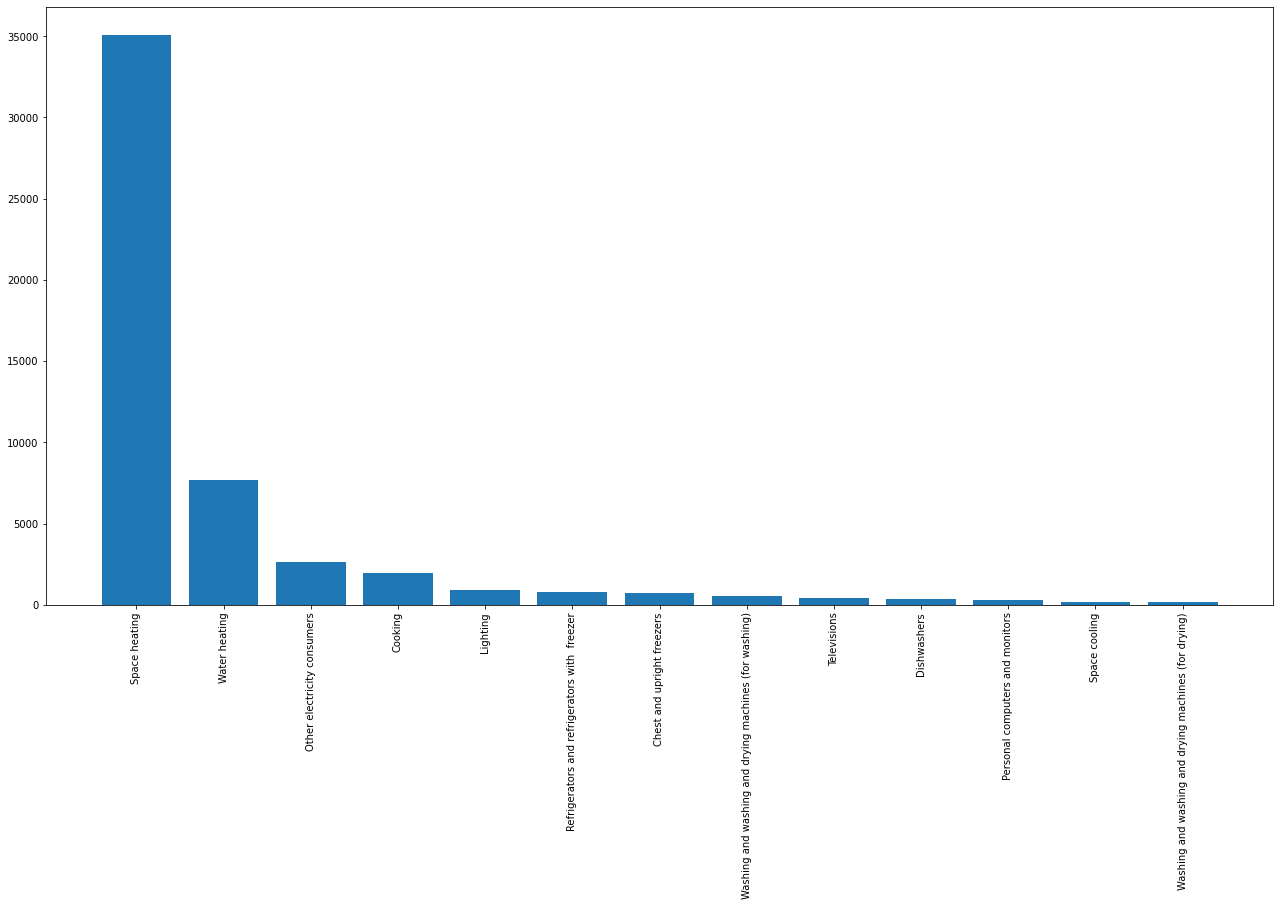

In [216]:
averages = []
transpose = npmat.transpose()
plt.figure(figsize=(22, 11))  
for x in transpose:
    averages.append(np.average(x))

np_names=np.array(names)
np_averages=np.array(averages)
indices = np.argsort(np_averages)[::-1]
plt.xticks(rotation='vertical')
plt.bar(np_names[indices],np_averages[indices])  
plt.show()


#### Which are the 2 biggest consumers of all energy uses by year and how much do they consume?
For this question we will extract the top 2 energy consumers and represent their consumption over the years.
The unit used in the data is TJ (Terajoules).

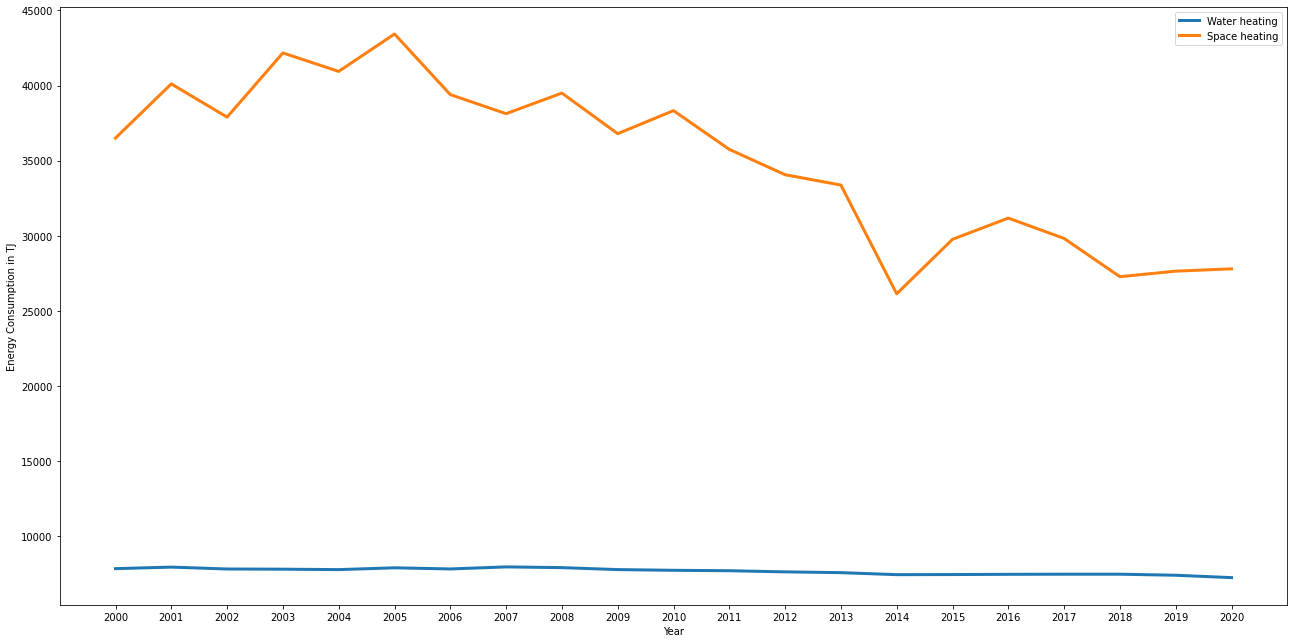

In [217]:

#Make dictionaries with top 2 consumption amounts by year
yearly_app = {}
yearly_cons={}
ct=0

for x in npmat:
    index_cons_max = np.argpartition(x, -2)[-2:]
    yearly_cons[str(2000+ct)]=x[index_cons_max]
    ct+=1


    
years=yearly_cons.keys()
n1=[]
n2=[]
for x in yearly_cons.values():
    n1.append(x[0])
    n2.append(x[1])



plt.figure(figsize=(22, 11))
plt.plot(years,n1,label=names[index_cons_max[0]], linewidth=3.0)
plt.plot(years,n2,label=names[index_cons_max[1]], linewidth=3.0)
plt.xlabel("Year")
plt.ylabel("Energy Consumption in TJ")

plt.legend()
plt.show()

#### Which energy source has been used the most throughout the years? ####
For this question we will find the most used energy source from the data that we have and make a graph of its usage for every year

In [218]:
#
usage_file =  open("usage_data.csv", "r")
totals = usage_file.readline().split(",")

year_dict = {}
for name,value in zip(column_names,totals):
    value = int(value)
    title = name.split(" ",1)[1].replace("\"","")
    year = name.split(" ",1)[0].replace("\"","")
    if title!="Energy source - TOTAL":
        if year not in year_dict:
            year_dict[year]=(title, value)
        else:
            if year_dict[year][1] < value:    
                year_dict[year]=(title, value)            

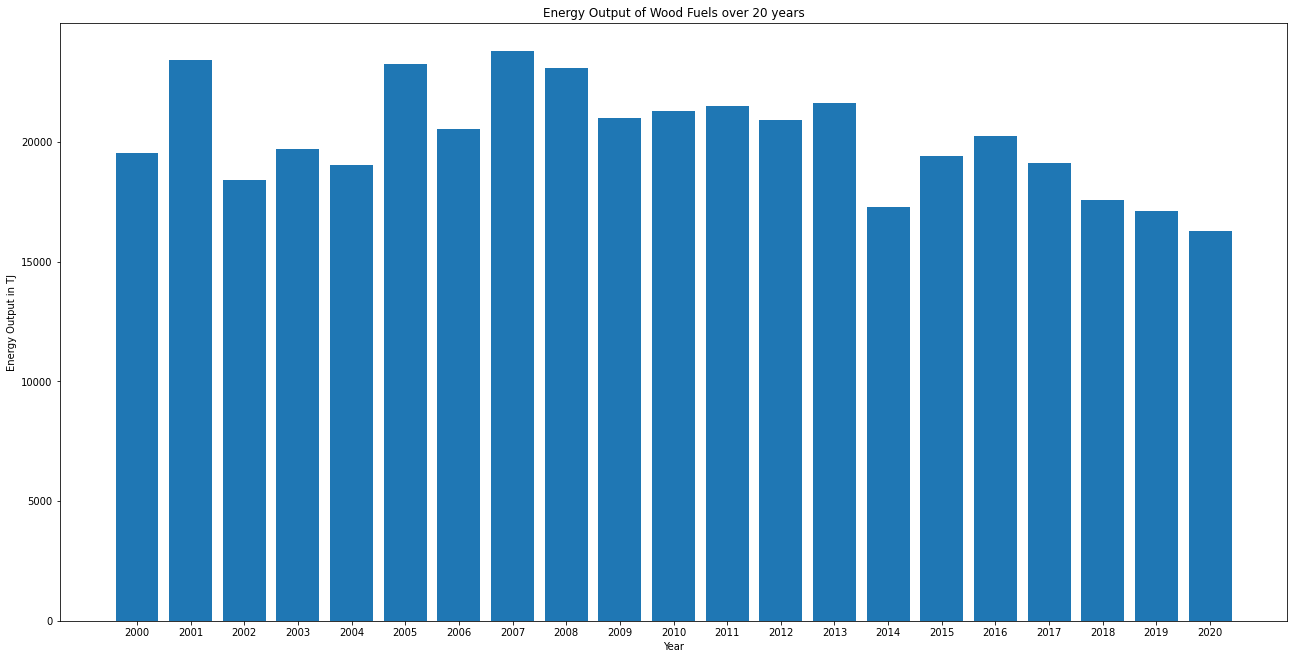

In [219]:
vals=[]
plt.figure(figsize=(22, 11))  
for x in year_dict.values():
    vals.append(x[1])
plt.bar(year_dict.keys(),vals)  
plt.xlabel("Year")
plt.ylabel("Energy Output in TJ")
plt.title("Energy Output of Wood Fuels over 20 years")
plt.show()

We have found that **Wood fuels** have consistently been the most used energy source throughout the last two decades.

#### Has the usage of some energy source noticeably changed throughout the years? ####
For this task we will compare the usage of different energy sources between the years 2000 and 2010, after that between 2010 and 2020 and finally 2000 and 2020 which is expected to show the most change

In [220]:
year_resources = {}
for name,value in zip(column_names,totals):
    value = int(value)
    title = name.split(" ",1)[1].replace("\"","")
    year = name.split(" ",1)[0].replace("\"","")
    if title!="Energy source - TOTAL" and year in ("2000", "2010", "2020"):
        if year not in year_resources:
            year_resources[year]= [(title, value)]
        else:
            year_resources[year].append((title, value))    
     

In [221]:
coal=[]
solar=[]
changes_all_sources={}
for i in range(len(year_resources["2000"])):
    resource = year_resources["2000"][i][0]
    y_change = []
    y_change.append((year_resources["2020"][i][1] - year_resources["2000"][i][1])/abs(year_resources["2000"][i][1]) * 100)
    y_change.append((year_resources["2010"][i][1] - year_resources["2000"][i][1])/abs(year_resources["2000"][i][1]) * 100)
    y_change.append((year_resources["2020"][i][1] - year_resources["2010"][i][1])/abs(year_resources["2010"][i][1]) * 100)

    print("%s: \n2000-2020: %.2f%% \n2000-2010: %.2f%% \n2010-2020: %.2f%%\n" % (resource, y_change[0], y_change[1], y_change[2]))
    if resource=="Coal":
        coal=y_change
    elif resource=="Solar energy":
        solar=y_change
    changes_all_sources[resource]=(y_change[0])    




Extra light fuel oil: 
2000-2020: -68.61% 
2000-2010: -19.98% 
2010-2020: -60.77%

Natural gas: 
2000-2020: 79.92% 
2000-2010: 93.93% 
2010-2020: -7.23%

Wood fuels: 
2000-2020: -16.60% 
2000-2010: 9.06% 
2010-2020: -23.53%

Liquefied petroleum gas: 
2000-2020: -42.14% 
2000-2010: -19.06% 
2010-2020: -28.52%

Electricity: 
2000-2020: 39.72% 
2000-2010: 23.76% 
2010-2020: 12.89%

Coal: 
2000-2020: -100.00% 
2000-2010: -88.21% 
2010-2020: -100.00%

District heat: 
2000-2020: -20.61% 
2000-2010: 7.33% 
2010-2020: -26.03%

Solar energy: 
2000-2020: 120.51% 
2000-2010: 75.38% 
2010-2020: 25.73%

Ambient heat: 
2000-2020: 7229.63% 
2000-2010: 1196.30% 
2010-2020: 465.43%



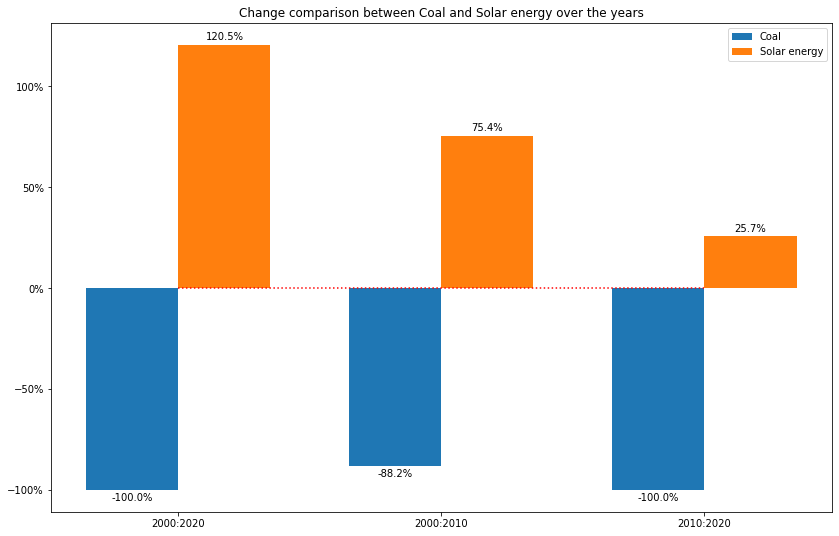

In [222]:
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure


labels = ["2000:2020","2000:2010","2010:2020" ]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 9))

plt.title("Change comparison between Coal and Solar energy over the years")

rects1 = ax.bar(x - width/2, coal, width, label='Coal')
rects2 = ax.bar(x + width/2, solar, width, label='Solar energy')
ax.legend()
ax.set_xticks(x,labels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.bar_label(rects1,fmt='%.1f%%', padding=3)
ax.bar_label(rects2,fmt='%.1f%%', padding=3)
ax.plot([0,0,0], linestyle="dotted", color="r")
plt.show()

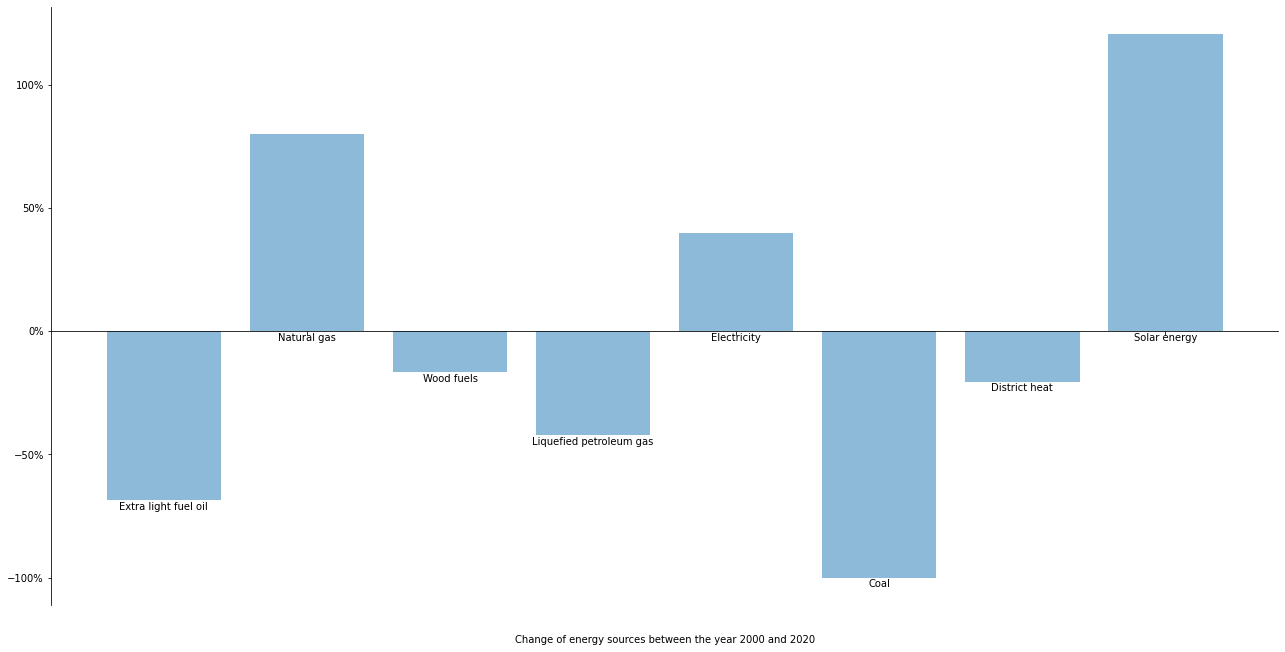

In [223]:
changes_all_sources
if "Ambient heat" in changes_all_sources.keys():
    changes_all_sources.pop("Ambient heat")
labels=changes_all_sources.keys()
values=changes_all_sources.values()  
y_pos = np.arange(len(labels))
plt.figure(figsize=(22, 11))  
#fig, ax = plt.subplots(figsize=(14, 9))
#ax.bar(pos,width)
plt.bar(y_pos, values, align='center', alpha=0.5)
# Get the axes object
ax = plt.gca()
# remove the existing ticklabels
ax.set_xticklabels([])
# remove the extra tick on the negative bar
ax.set_xticks([idx for (idx, x) in enumerate(values) if x > 0])
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# placing each of the x-axis labels individually
label_offset = 0.5
for language, (x_position, y_position) in zip(labels, enumerate(values)):
    if y_position > 0:
        label_y = -label_offset
    else:
        label_y = y_position - label_offset
    ax.text(x_position, label_y, language, ha="center", va="top")
# Placing the x-axis label, note the transformation into `Axes` co-ordinates
# previously data co-ordinates for the x ticklabels
ax.text(0.5, -0.05, "Change of energy sources between the year 2000 and 2020", ha="center", va="top", transform=ax.transAxes)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


#### How much has the usage of sources changed over the years? ####

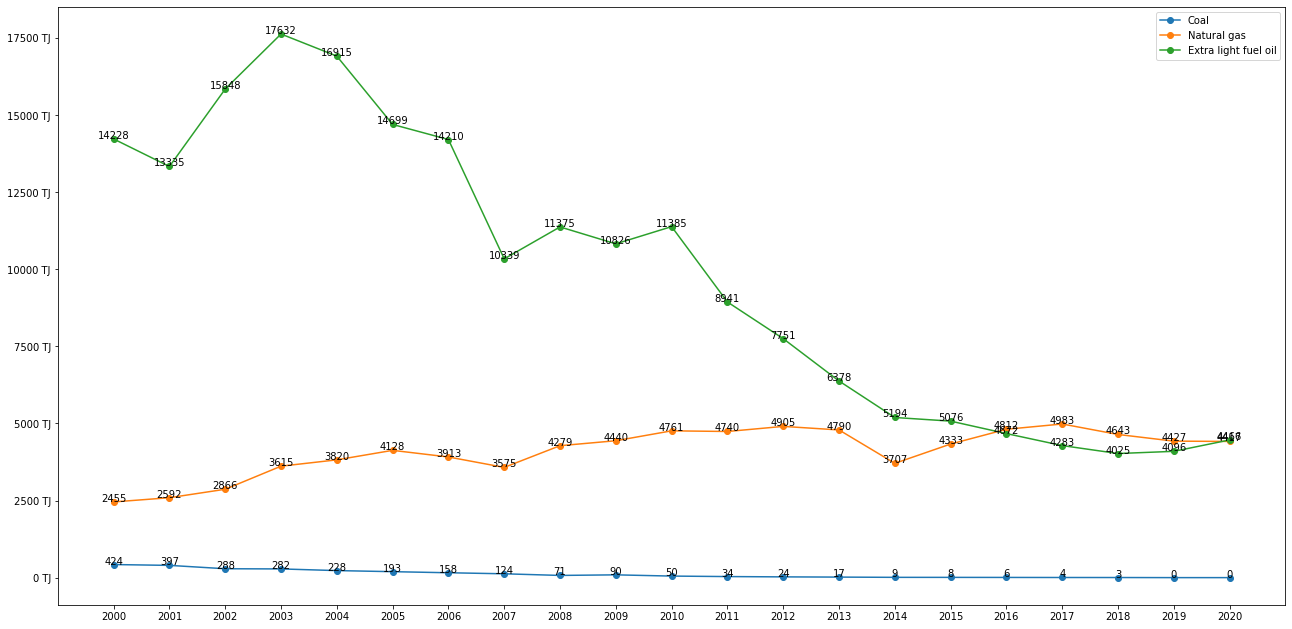

In [224]:
from matplotlib.ticker import FormatStrFormatter
year_dict_all = {}
for name,value in zip(column_names,totals):
    value = int(value)
    title = name.split(" ",1)[1].replace("\"","")
    year = name.split(" ",1)[0].replace("\"","")
    if title!="Energy source - TOTAL":
        if year not in year_dict_all:
            year_dict_all[year]=[]
        year_dict_all[year].append((title,value))

coal_vals=[]        
for x in year_dict_all.values():
    coal_vals.append(x[5][1])   

natural_gas=[]      
for x in year_dict_all.values():
    natural_gas.append(x[1][1])       

exlf=[]      
for x in year_dict_all.values():
    exlf.append(x[0][1])         

fig, ax = plt.subplots(figsize=(22, 11))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d TJ'))   
for i, v in enumerate(coal_vals):
    ax.text(i, v+12, "%d" %v, ha="center")
for i, v in enumerate(natural_gas):
    ax.text(i, v+12, "%d" %v, ha="center")
for i, v in enumerate(exlf):
    ax.text(i, v+12, "%d" %v, ha="center")
       
ax.plot(year_dict_all.keys(),coal_vals, marker="o", label="Coal")    
ax.plot(year_dict_all.keys(),natural_gas, marker="o",label="Natural gas")   
ax.plot(year_dict_all.keys(),exlf, marker="o",label="Extra light fuel oil")  
ax.legend() 

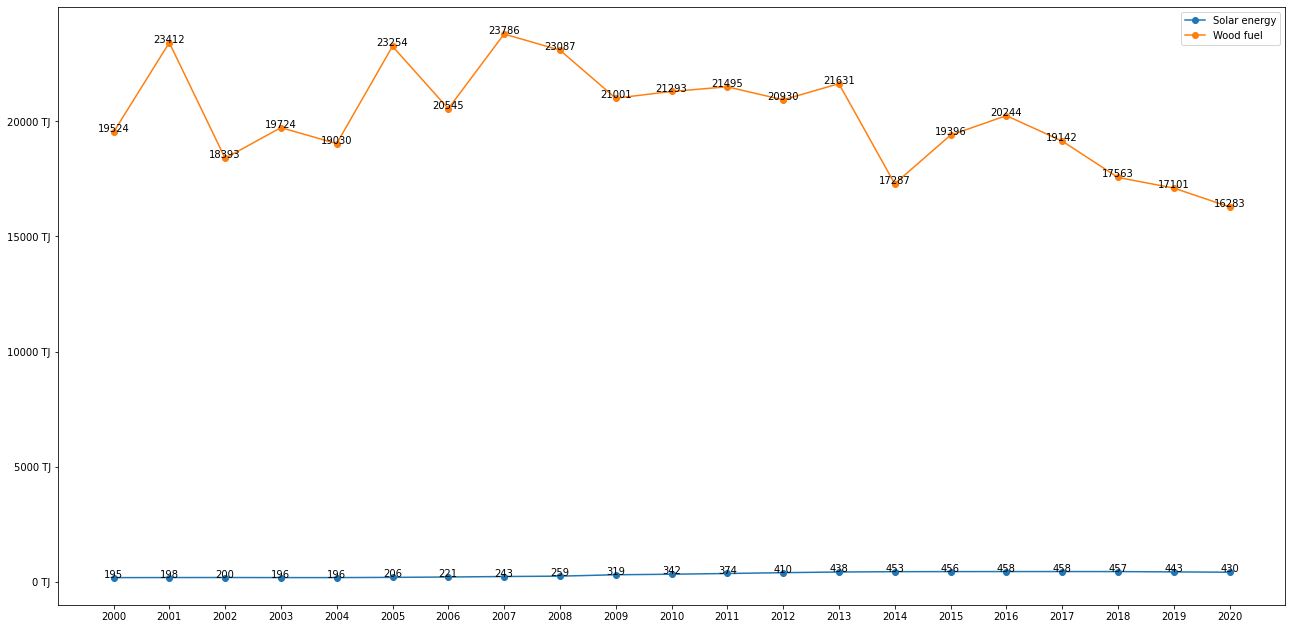

In [226]:
solar=[]      
for x in year_dict_all.values():
    solar.append(x[7][1])
wood=[]      
for x in year_dict_all.values():
    wood.append(x[2][1])
fig, ax = plt.subplots(figsize=(22, 11))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d TJ'))   
for i, v in enumerate(solar):
    ax.text(i, v+12, "%d" %v, ha="center")
for i, v in enumerate(wood):
    ax.text(i, v+12, "%d" %v, ha="center")
ax.plot(year_dict_all.keys(),solar, marker="o", label="Solar energy")    
ax.plot(year_dict_all.keys(),wood, marker="o",label="Wood fuel")      
ax.legend() 

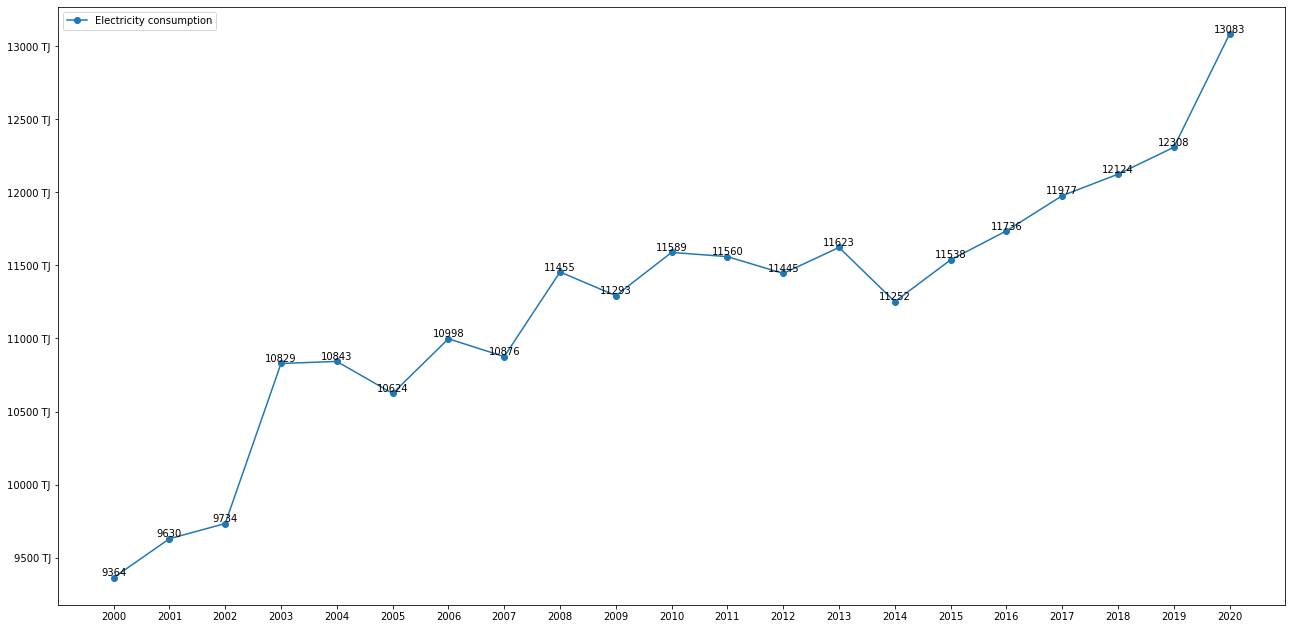

In [235]:
elect=[]      
for x in year_dict_all.values():
    elect.append(x[4][1])
fig, ax = plt.subplots(figsize=(22, 11))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d TJ'))   
for i, v in enumerate(elect):
    ax.text(i, v+12, "%d" %v, ha="center")
ax.plot(year_dict_all.keys(),elect, marker="o", label="Electricity consumption")    
    
leg = ax.legend(loc="upper left") 